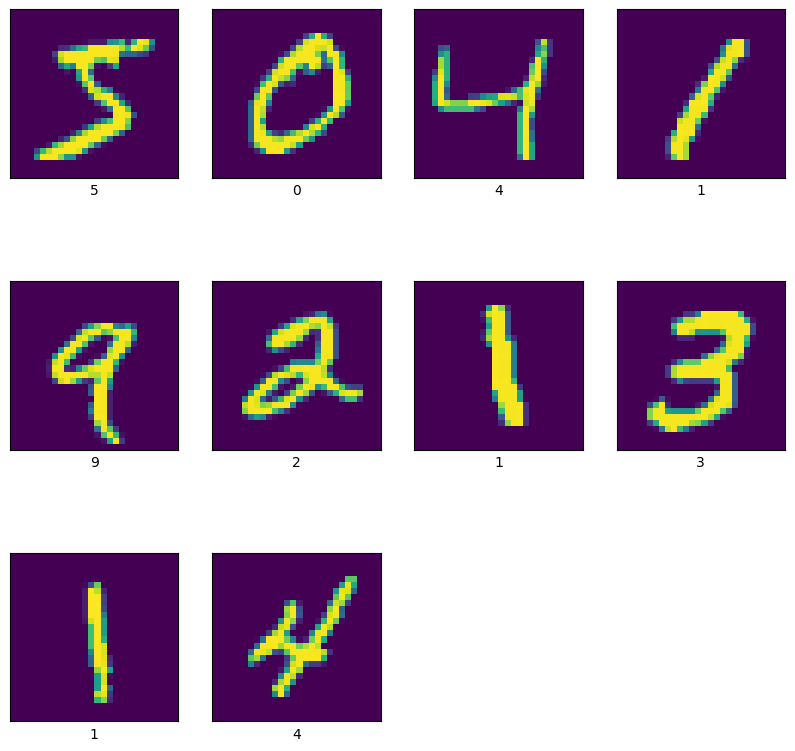

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 838us/step - accuracy: 0.8941 - loss: 0.3550
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - accuracy: 0.9698 - loss: 0.1003
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 827us/step - accuracy: 0.9785 - loss: 0.0682
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 841us/step - accuracy: 0.9828 - loss: 0.0529
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 908us/step - accuracy: 0.9864 - loss: 0.0407
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 857us/step - accuracy: 0.9885 - loss: 0.0360
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 862us/step - accuracy: 0.9890 - loss: 0.0329
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 853us/step - accuracy: 0.9911 - loss: 0.0293
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 825us/step - accuracy: 0.9917 - loss: 0.0234
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step - accuracy: 0.9933 - loss: 0.0199


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (10, 15)               │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,135 (1.26 MB)

 Trainable params: 109,711 (428.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 219,424 (857.13 KB)

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

mnist = tf.keras.datasets.mnist
#fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train,f_label_train),(f_image_test,f_label_test) = mnist.load_data()
f_image_train,f_image_test = f_image_train / 255.0,f_image_test/255.0

#class_names = ['T_shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

model =Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(15,activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

model.fit(f_image_train,f_label_train,epochs =10,batch_size =10)
model.summary()
model.save('mnist.h5')


In [10]:
import cv2

model = tf.keras.models.load_model('./mnist.h5')
mnist = tf.keras.datasets.mnist
(f_image_train,f_label_train),(f_image_test,f_label_test)=mnist.load_data()

f_image_train,f_image_test = f_image_train/255.0,f_image_test/255.0

num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print('*Prediction,',np.argmax(predict,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[5 0 4 1 9 2 1 3 1 4]
*Prediction, [5 0 4 1 9 2 1 3 1 4]


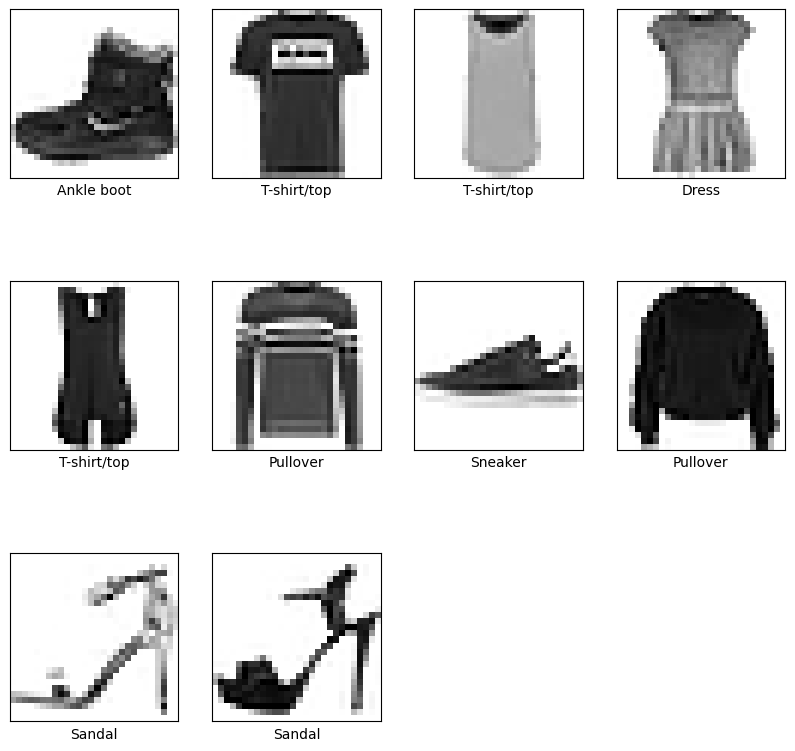

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 883us/step - accuracy: 0.7839 - loss: 0.6037
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 836us/step - accuracy: 0.8619 - loss: 0.3796
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 868us/step - accuracy: 0.8750 - loss: 0.3390
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 901us/step - accuracy: 0.8832 - loss: 0.3135
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 868us/step - accuracy: 0.8898 - loss: 0.2956
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 894us/step - accuracy: 0.8951 - loss: 0.2778
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 891us/step - accuracy: 0.9006 - loss: 0.2681
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 854us/step - accuracy: 0.9020 - loss: 0.2601
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step - accuracy: 0.9036 - loss: 0.2555
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 825us/step - accuracy: 0.9070 - loss: 0.2438


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1] range
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

# Class names corresponding to Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 10 images in the dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i], cmap=plt.cm.binary)  # Specify the colormap
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # First dense layer with 128 neurons
    Dense(64, activation='relu'),   # Second dense layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(f_image_train, f_label_train, epochs=10, batch_size=10)

# Display the model summary
model.summary()

# Save the model
model.save('fashion_mnist.h5')


In [13]:
import cv2

model = tf.keras.models.load_model('./fashion_mnist.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train,f_label_train),(f_image_test,f_label_test)=fashion_mnist.load_data()

f_image_train,f_image_test = f_image_train/255.0,f_image_test/255.0

num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print('*Prediction,',np.argmax(predict,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[9 0 0 3 0 2 7 2 5 5]
*Prediction, [9 0 0 3 0 2 7 2 5 5]


['test', 'train', 'chest_xray', '__MACOSX', 'val']
2
normal picture title :  NORMAL2-IM-1266-0001-0002.jpeg
pneumonia picture title :  person1317_virus_2273.jpeg


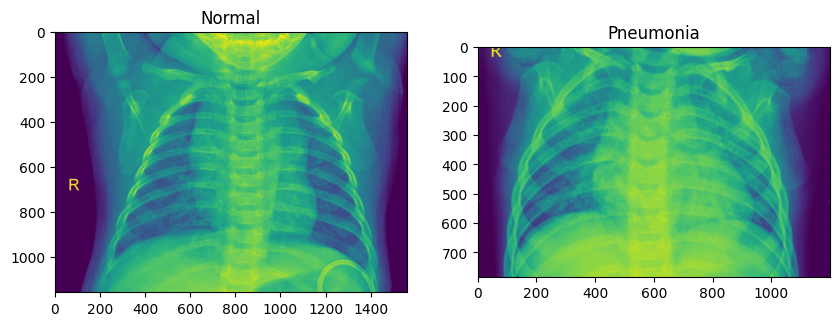

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

mainDIR = os.listdir('./archive/chest_xray')
print(mainDIR)
train_folder = './archive/chest_xray/train/'
val_folder = './archive/chest_xray/val/'
test_folder = './archive/chest_xray/test/'

os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

print(len(os.listdir(train_folder)))
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title : ',norm_pic)
norm_pic_address = train_n+norm_pic

rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address=train_p+sic_pic
print('pneumonia picture title : ',sic_pic)

norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
f = plt.figure(figsize = (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a1 = f.add_subplot(1,2,2)
img_plot = plt.imshow(sic_load)
a1.set_title('Pneumonia')
plt.show()

In [25]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)
# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [26]:
num_of_test_samples = 600
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_test = train_datagen.flow_from_directory('archive/chest_xray/train',target_size = (64,64),batch_size = 32,class_mode = 'binary')

validation_generator =test_datagen.flow_from_directory('archive/chest_xray/val',target_size = (64,64),batch_size = 32,class_mode = 'binary')

test_set = test_datagen.flow_from_directory('archive/chest_xray/test',target_size = (64,64),batch_size = 32,class_mode = 'binary')


model_fin.summary()

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
cnn_model = model_fin.fit(training_test,steps_per_epoch = 163,epochs = 10,validation_data = validation_generator,validation_steps = 624)
test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.7428 - loss: 0.8893 - val_accuracy: 0.8750 - val_loss: 0.4168
Epoch 2/10


/home/park/workspace/HW_perceptron_ANN/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/park/workspace/HW_perceptron_ANN/.venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.8400 - loss: 0.3781 - val_accuracy: 0.7500 - val_loss: 0.4810
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9014 - loss: 0.2533 - val_accuracy: 0.9375 - val_loss: 0.3861
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.8951 - loss: 0.2555 - val_accuracy: 0.8125 - val_loss: 0.4039
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.8841 - loss: 0.2737 - val_accuracy: 0.8125 - val_loss: 0.4317
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.8815 - loss: 0.2732 - val_accuracy: 0.8750 - val_loss: 0.3936
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.8767 - loss: 0.2891 - val_accuracy: 0.6875 - val_loss: 0.6106
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.8750 - loss: 0.2746 - val_accuracy: 0.8125 - val_loss: 0.5500
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.8973 - loss: 0.2368 - val

The testing accuracy is : 84.45512652397156 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


np.int64(0)

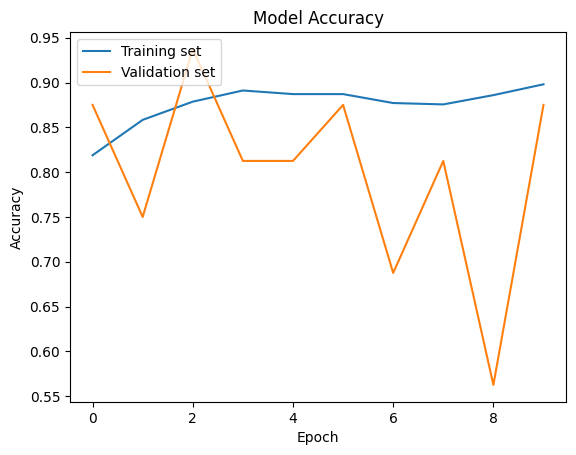

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set','Validation set'],loc = 'upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

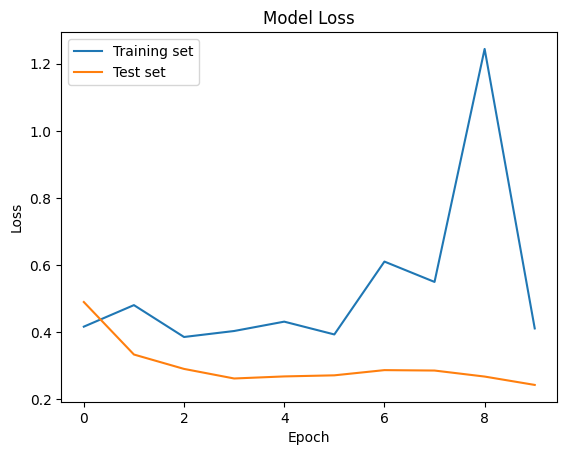

<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],
loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()